In [0]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple


In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
import imageio
import glob
import os
import scipy.io
from scipy import signal
from scipy import ndimage
import math
from keras.utils import to_categorical #for one hot encoding
from keras import optimizers

#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility\n
np.random.seed(1)

In [0]:
import pickle
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from keras.utils import to_categorical
from keras.models import Model
from keras.utils import np_utils
# import BatchNormalization
from keras.layers.normalization import BatchNormalization

## Dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [0]:
train_set_X = train_features
train_set_Y = train_labels
test_set_X = test_features
test_set_Y = test_labels

In [0]:
def print_shapes_of_dataset():
  print("Train X shape: \t" + str(train_set_X.shape))
  print("Train Y shape: \t" + str(train_set_Y.shape))
  print("Test X shape: \t" + str(test_set_X.shape))
  print("Test Y shape: \t" + str(test_set_Y.shape))

print_shapes_of_dataset()

Train X shape: 	(50000, 32, 32, 3)
Train Y shape: 	(50000, 1)
Test X shape: 	(10000, 32, 32, 3)
Test Y shape: 	(10000, 1)


In [0]:
input_shape = train_set_X.shape[1:]
print(input_shape)

(32, 32, 3)


In [0]:
# one hot encode
encoded_train_Y = to_categorical(train_set_Y)
encoded_train_Y = encoded_train_Y.reshape(encoded_train_Y.shape[0], encoded_train_Y.shape[1])

print(encoded_train_Y.shape)

# one hot encode
encoded_test_Y = to_categorical(test_set_Y)
encoded_test_Y = encoded_test_Y.reshape(encoded_test_Y.shape[0], encoded_test_Y.shape[1])

print(encoded_test_Y.shape)

(50000, 10)
(10000, 10)


## Model

In [0]:
#Define model
model = Sequential()

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed


model.add(Conv2D(32, kernel_size = (3, 3),
                 input_shape = input_shape,
                 name = 'conv_layer_1'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, kernel_size = (3, 3),
                 input_shape = input_shape,
                 name = 'conv_layer_2'))
model.add(BatchNormalization())
model.add(Activation('relu'))


#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_1'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(64, kernel_size = (3, 3),
                 name = 'conv_layer_3'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, kernel_size = (3, 3),
                 name = 'conv_layer_4'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Activation('relu'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_2'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(128, kernel_size = (3, 3),
                 name = 'conv_layer_5'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name = 'max_pool_layer_3'))

#Add a layer that will flatten out the tensor
model.add(Flatten(name = 'flatten_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(1024, name='dense_layer_1'))
model.add(Dropout(0.5))
#model.add(BatchNormalization())
model.add(Activation('relu'))

#Add a final dense layer that will be used for prediction
model.add(Dense(encoded_train_Y.shape[1], activation = 'softmax',name='final_layer'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer_1 (Conv2D)        (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pool_layer_1 (MaxPooling (None, 14, 14, 32)        0         
__________

In [0]:
#Compile the model tell which loss to use and the optimizer and a evaluation metric if any
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.SGD(lr=0.001, decay=1e-6),
              metrics=['accuracy'])

In [0]:
history_1 = model.fit(train_set_X, encoded_train_Y,
          batch_size = 50,
          epochs = 100,
          validation_data = (test_set_X, encoded_test_Y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
33100/50000 [==================>...........] - ETA: 9s - loss: 2.2211 - acc: 0.1811

50000/50000 [==============================] - 29s 581us/step - loss: 2.1503 - acc: 0.2036 - val_loss: 1.9711 - val_acc: 0.3188
Epoch 2/100
42200/50000 [========================>.....] - ETA: 4s - loss: 1.8735 - acc: 0.2986

50000/50000 [==============================] - 28s 551us/step - loss: 1.8629 - acc: 0.3028 - val_loss: 1.8462 - val_acc: 0.3586
Epoch 3/100
44950/50000 [=========================>....] - ETA: 2s - loss: 1.7437 - acc: 0.3497

50000/50000 [==============================] - 27s 550us/step - loss: 1.7396 - acc: 0.3516 - val_loss: 1.7677 - val_acc: 0.3869
Epoch 4/100
47800/50000 [===========================>..] - ETA: 1s - loss: 1.6496 - acc: 0.3860

50000/50000 [==============================] - 27s 545us/step - loss: 1.6480 - acc: 0.3868 - val_loss: 1.7149 - val_acc: 0.4114
Epoch 5/100
49250/50000 [============================>.] - ETA: 0s - loss: 1.5860 - acc: 0.4112

50000/50000 [==============================] - 27s 542us/step - loss: 1.5858 - acc: 0.4112 - val_loss: 1.6502 - val_acc: 0.4258
Epoch 6/100
50000/50000 [==============================] - 27s 544us/step - loss: 1.5242 - acc: 0.4391 - val_loss: 1.6002 - val_acc: 0.4431
Epoch 7/100
   50/50000 [..............................] - ETA: 30s - loss: 1.4686 - acc: 0.4400

50000/50000 [==============================] - 29s 570us/step - loss: 1.4668 - acc: 0.4616 - val_loss: 1.5752 - val_acc: 0.4625
Epoch 8/100
26500/50000 [==============>...............] - ETA: 12s - loss: 1.4317 - acc: 0.4778

50000/50000 [==============================] - 29s 576us/step - loss: 1.4242 - acc: 0.4791 - val_loss: 1.5417 - val_acc: 0.4607
Epoch 9/100
36150/50000 [====================>.........] - ETA: 7s - loss: 1.3969 - acc: 0.4912

50000/50000 [==============================] - 28s 569us/step - loss: 1.3890 - acc: 0.4947 - val_loss: 1.6004 - val_acc: 0.4393
Epoch 10/100
39700/50000 [======================>.......] - ETA: 5s - loss: 1.3539 - acc: 0.5082

50000/50000 [==============================] - 28s 567us/step - loss: 1.3513 - acc: 0.5093 - val_loss: 1.4494 - val_acc: 0.4928
Epoch 11/100
41200/50000 [=======================>......] - ETA: 4s - loss: 1.3254 - acc: 0.5169

50000/50000 [==============================] - 28s 564us/step - loss: 1.3230 - acc: 0.5184 - val_loss: 1.5019 - val_acc: 0.4776
Epoch 12/100
42700/50000 [========================>.....] - ETA: 3s - loss: 1.2914 - acc: 0.5339

50000/50000 [==============================] - 28s 558us/step - loss: 1.2941 - acc: 0.5330 - val_loss: 1.4269 - val_acc: 0.5063
Epoch 13/100
44100/50000 [=========================>....] - ETA: 3s - loss: 1.2714 - acc: 0.5413

50000/50000 [==============================] - 28s 554us/step - loss: 1.2688 - acc: 0.5423 - val_loss: 1.4281 - val_acc: 0.4992
Epoch 14/100
44650/50000 [=========================>....] - ETA: 2s - loss: 1.2481 - acc: 0.5542

50000/50000 [==============================] - 28s 556us/step - loss: 1.2482 - acc: 0.5541 - val_loss: 1.4747 - val_acc: 0.4881
Epoch 15/100
44100/50000 [=========================>....] - ETA: 3s - loss: 1.2259 - acc: 0.5598

50000/50000 [==============================] - 28s 558us/step - loss: 1.2242 - acc: 0.5605 - val_loss: 1.4283 - val_acc: 0.5173
Epoch 16/100
44300/50000 [=========================>....] - ETA: 2s - loss: 1.2095 - acc: 0.5697

50000/50000 [==============================] - 28s 556us/step - loss: 1.2062 - acc: 0.5710 - val_loss: 1.3528 - val_acc: 0.5316
Epoch 17/100
44050/50000 [=========================>....] - ETA: 3s - loss: 1.1832 - acc: 0.5775

50000/50000 [==============================] - 28s 559us/step - loss: 1.1846 - acc: 0.5774 - val_loss: 1.2755 - val_acc: 0.5614
Epoch 18/100
44200/50000 [=========================>....] - ETA: 3s - loss: 1.1701 - acc: 0.5834

50000/50000 [==============================] - 28s 557us/step - loss: 1.1703 - acc: 0.5833 - val_loss: 1.2890 - val_acc: 0.5513
Epoch 19/100
44800/50000 [=========================>....] - ETA: 2s - loss: 1.1595 - acc: 0.5867

50000/50000 [==============================] - 28s 553us/step - loss: 1.1568 - acc: 0.5885 - val_loss: 1.3040 - val_acc: 0.5482
Epoch 20/100
44200/50000 [=========================>....] - ETA: 3s - loss: 1.1409 - acc: 0.5929

50000/50000 [==============================] - 28s 560us/step - loss: 1.1390 - acc: 0.5933 - val_loss: 1.3158 - val_acc: 0.5436
Epoch 21/100
44300/50000 [=========================>....] - ETA: 2s - loss: 1.1284 - acc: 0.5963

50000/50000 [==============================] - 28s 552us/step - loss: 1.1264 - acc: 0.5976 - val_loss: 1.5439 - val_acc: 0.4593
Epoch 22/100
43800/50000 [=========================>....] - ETA: 3s - loss: 1.1104 - acc: 0.6060

50000/50000 [==============================] - 28s 558us/step - loss: 1.1097 - acc: 0.6068 - val_loss: 1.2400 - val_acc: 0.5700
Epoch 23/100
43950/50000 [=========================>....] - ETA: 3s - loss: 1.1034 - acc: 0.6082

50000/50000 [==============================] - 28s 558us/step - loss: 1.1002 - acc: 0.6095 - val_loss: 1.2137 - val_acc: 0.5877
Epoch 24/100
43850/50000 [=========================>....] - ETA: 3s - loss: 1.0880 - acc: 0.6145

50000/50000 [==============================] - 28s 560us/step - loss: 1.0890 - acc: 0.6137 - val_loss: 1.2838 - val_acc: 0.5479
Epoch 25/100
42250/50000 [========================>.....] - ETA: 4s - loss: 1.0699 - acc: 0.6226

50000/50000 [==============================] - 29s 577us/step - loss: 1.0735 - acc: 0.6215 - val_loss: 1.2377 - val_acc: 0.5785
Epoch 26/100
41650/50000 [=======================>......] - ETA: 4s - loss: 1.0577 - acc: 0.6278

50000/50000 [==============================] - 29s 573us/step - loss: 1.0634 - acc: 0.6255 - val_loss: 1.2122 - val_acc: 0.5815
Epoch 27/100
41550/50000 [=======================>......] - ETA: 4s - loss: 1.0490 - acc: 0.6281

50000/50000 [==============================] - 29s 573us/step - loss: 1.0520 - acc: 0.6273 - val_loss: 1.2414 - val_acc: 0.5608
Epoch 28/100
41250/50000 [=======================>......] - ETA: 4s - loss: 1.0407 - acc: 0.6312

50000/50000 [==============================] - 29s 583us/step - loss: 1.0439 - acc: 0.6290 - val_loss: 1.1952 - val_acc: 0.5894
Epoch 29/100
41150/50000 [=======================>......] - ETA: 4s - loss: 1.0335 - acc: 0.6355

50000/50000 [==============================] - 29s 576us/step - loss: 1.0320 - acc: 0.6351 - val_loss: 1.2437 - val_acc: 0.5695
Epoch 30/100
41350/50000 [=======================>......] - ETA: 4s - loss: 1.0319 - acc: 0.6363

50000/50000 [==============================] - 29s 581us/step - loss: 1.0271 - acc: 0.6375 - val_loss: 1.3201 - val_acc: 0.5273
Epoch 31/100
41400/50000 [=======================>......] - ETA: 4s - loss: 1.0181 - acc: 0.6399

50000/50000 [==============================] - 28s 569us/step - loss: 1.0134 - acc: 0.6418 - val_loss: 1.2926 - val_acc: 0.5368
Epoch 32/100
41600/50000 [=======================>......] - ETA: 4s - loss: 1.0056 - acc: 0.6437

50000/50000 [==============================] - 28s 569us/step - loss: 1.0041 - acc: 0.6447 - val_loss: 1.2009 - val_acc: 0.5859
Epoch 33/100
41600/50000 [=======================>......] - ETA: 4s - loss: 1.0001 - acc: 0.6480

50000/50000 [==============================] - 28s 569us/step - loss: 0.9960 - acc: 0.6489 - val_loss: 1.2206 - val_acc: 0.5741
Epoch 34/100
41550/50000 [=======================>......] - ETA: 4s - loss: 0.9885 - acc: 0.6529

50000/50000 [==============================] - 29s 570us/step - loss: 0.9912 - acc: 0.6513 - val_loss: 1.1962 - val_acc: 0.5819
Epoch 35/100
41400/50000 [=======================>......] - ETA: 4s - loss: 0.9781 - acc: 0.6561

50000/50000 [==============================] - 29s 573us/step - loss: 0.9799 - acc: 0.6547 - val_loss: 1.2800 - val_acc: 0.5584
Epoch 36/100
41400/50000 [=======================>......] - ETA: 4s - loss: 0.9778 - acc: 0.6557

50000/50000 [==============================] - 29s 573us/step - loss: 0.9740 - acc: 0.6566 - val_loss: 1.1505 - val_acc: 0.6035
Epoch 37/100
41350/50000 [=======================>......] - ETA: 4s - loss: 0.9671 - acc: 0.6585

50000/50000 [==============================] - 29s 581us/step - loss: 0.9677 - acc: 0.6582 - val_loss: 1.1765 - val_acc: 0.5806
Epoch 38/100
41250/50000 [=======================>......] - ETA: 4s - loss: 0.9526 - acc: 0.6650

50000/50000 [==============================] - 29s 576us/step - loss: 0.9527 - acc: 0.6644 - val_loss: 1.1755 - val_acc: 0.5947
Epoch 39/100
41400/50000 [=======================>......] - ETA: 4s - loss: 0.9454 - acc: 0.6664

50000/50000 [==============================] - 29s 570us/step - loss: 0.9478 - acc: 0.6660 - val_loss: 1.1870 - val_acc: 0.5882
Epoch 40/100
41450/50000 [=======================>......] - ETA: 4s - loss: 0.9451 - acc: 0.6690

50000/50000 [==============================] - 29s 572us/step - loss: 0.9411 - acc: 0.6697 - val_loss: 1.1573 - val_acc: 0.6073
Epoch 41/100
41150/50000 [=======================>......] - ETA: 4s - loss: 0.9365 - acc: 0.6703

50000/50000 [==============================] - 30s 590us/step - loss: 0.9372 - acc: 0.6712 - val_loss: 1.1930 - val_acc: 0.5850
Epoch 42/100
41100/50000 [=======================>......] - ETA: 4s - loss: 0.9286 - acc: 0.6722

50000/50000 [==============================] - 29s 580us/step - loss: 0.9291 - acc: 0.6728 - val_loss: 1.1041 - val_acc: 0.6184
Epoch 43/100
41050/50000 [=======================>......] - ETA: 4s - loss: 0.9212 - acc: 0.6736

50000/50000 [==============================] - 29s 578us/step - loss: 0.9205 - acc: 0.6742 - val_loss: 1.1415 - val_acc: 0.6010
Epoch 44/100
41100/50000 [=======================>......] - ETA: 4s - loss: 0.9111 - acc: 0.6791

50000/50000 [==============================] - 29s 579us/step - loss: 0.9115 - acc: 0.6797 - val_loss: 1.1959 - val_acc: 0.5704
Epoch 45/100
41200/50000 [=======================>......] - ETA: 4s - loss: 0.9023 - acc: 0.6816

50000/50000 [==============================] - 29s 570us/step - loss: 0.9064 - acc: 0.6808 - val_loss: 1.1364 - val_acc: 0.6054
Epoch 46/100
41500/50000 [=======================>......] - ETA: 4s - loss: 0.9016 - acc: 0.6854

50000/50000 [==============================] - 28s 570us/step - loss: 0.8999 - acc: 0.6860 - val_loss: 1.1830 - val_acc: 0.5986
Epoch 47/100
41450/50000 [=======================>......] - ETA: 4s - loss: 0.8929 - acc: 0.6863

50000/50000 [==============================] - 28s 570us/step - loss: 0.8939 - acc: 0.6854 - val_loss: 1.2282 - val_acc: 0.5763
Epoch 48/100
41300/50000 [=======================>......] - ETA: 4s - loss: 0.8860 - acc: 0.6889

50000/50000 [==============================] - 28s 569us/step - loss: 0.8882 - acc: 0.6887 - val_loss: 1.0909 - val_acc: 0.6324
Epoch 49/100
42100/50000 [========================>.....] - ETA: 4s - loss: 0.8827 - acc: 0.6889

50000/50000 [==============================] - 28s 565us/step - loss: 0.8828 - acc: 0.6891 - val_loss: 1.3772 - val_acc: 0.5305
Epoch 50/100
42200/50000 [========================>.....] - ETA: 4s - loss: 0.8778 - acc: 0.6914

50000/50000 [==============================] - 28s 568us/step - loss: 0.8783 - acc: 0.6917 - val_loss: 1.1109 - val_acc: 0.6087
Epoch 51/100
41600/50000 [=======================>......] - ETA: 4s - loss: 0.8730 - acc: 0.6947

50000/50000 [==============================] - 29s 589us/step - loss: 0.8722 - acc: 0.6952 - val_loss: 1.1153 - val_acc: 0.6119
Epoch 52/100
41650/50000 [=======================>......] - ETA: 4s - loss: 0.8703 - acc: 0.6947

50000/50000 [==============================] - 28s 566us/step - loss: 0.8693 - acc: 0.6945 - val_loss: 1.1492 - val_acc: 0.6019
Epoch 53/100
41500/50000 [=======================>......] - ETA: 4s - loss: 0.8604 - acc: 0.7008

50000/50000 [==============================] - 29s 580us/step - loss: 0.8626 - acc: 0.6998 - val_loss: 1.2141 - val_acc: 0.5744
Epoch 54/100
41300/50000 [=======================>......] - ETA: 4s - loss: 0.8566 - acc: 0.7025

50000/50000 [==============================] - 29s 576us/step - loss: 0.8529 - acc: 0.7035 - val_loss: 1.0753 - val_acc: 0.6321
Epoch 55/100
41200/50000 [=======================>......] - ETA: 4s - loss: 0.8469 - acc: 0.7024

50000/50000 [==============================] - 29s 585us/step - loss: 0.8506 - acc: 0.7020 - val_loss: 1.0897 - val_acc: 0.6259
Epoch 56/100
41050/50000 [=======================>......] - ETA: 4s - loss: 0.8406 - acc: 0.7068

50000/50000 [==============================] - 29s 575us/step - loss: 0.8424 - acc: 0.7056 - val_loss: 1.0455 - val_acc: 0.6386
Epoch 57/100
41200/50000 [=======================>......] - ETA: 4s - loss: 0.8409 - acc: 0.7066

50000/50000 [==============================] - 29s 576us/step - loss: 0.8414 - acc: 0.7063 - val_loss: 1.2510 - val_acc: 0.5678
Epoch 58/100
41050/50000 [=======================>......] - ETA: 4s - loss: 0.8275 - acc: 0.7088

50000/50000 [==============================] - 29s 577us/step - loss: 0.8306 - acc: 0.7076 - val_loss: 1.1254 - val_acc: 0.6033
Epoch 59/100
41100/50000 [=======================>......] - ETA: 4s - loss: 0.8217 - acc: 0.7122

50000/50000 [==============================] - 29s 573us/step - loss: 0.8272 - acc: 0.7103 - val_loss: 1.1209 - val_acc: 0.6171
Epoch 60/100
41500/50000 [=======================>......] - ETA: 4s - loss: 0.8189 - acc: 0.7117

50000/50000 [==============================] - 28s 568us/step - loss: 0.8196 - acc: 0.7119 - val_loss: 1.1152 - val_acc: 0.6181
Epoch 61/100
41450/50000 [=======================>......] - ETA: 4s - loss: 0.8178 - acc: 0.7152

50000/50000 [==============================] - 28s 570us/step - loss: 0.8204 - acc: 0.7142 - val_loss: 1.1042 - val_acc: 0.6212
Epoch 62/100
40500/50000 [=======================>......] - ETA: 5s - loss: 0.8101 - acc: 0.7144

50000/50000 [==============================] - 32s 631us/step - loss: 0.8150 - acc: 0.7145 - val_loss: 1.1481 - val_acc: 0.6064
Epoch 63/100
40650/50000 [=======================>......] - ETA: 5s - loss: 0.8093 - acc: 0.7185

50000/50000 [==============================] - 29s 589us/step - loss: 0.8085 - acc: 0.7175 - val_loss: 1.0367 - val_acc: 0.6452
Epoch 64/100
41400/50000 [=======================>......] - ETA: 4s - loss: 0.8016 - acc: 0.7199

50000/50000 [==============================] - 30s 590us/step - loss: 0.8041 - acc: 0.7196 - val_loss: 1.0057 - val_acc: 0.6599
Epoch 65/100
41050/50000 [=======================>......] - ETA: 4s - loss: 0.8005 - acc: 0.7192

50000/50000 [==============================] - 29s 581us/step - loss: 0.8024 - acc: 0.7187 - val_loss: 1.0357 - val_acc: 0.6427
Epoch 66/100
41350/50000 [=======================>......] - ETA: 4s - loss: 0.8005 - acc: 0.7217

50000/50000 [==============================] - 29s 578us/step - loss: 0.7989 - acc: 0.7219 - val_loss: 1.0314 - val_acc: 0.6463
Epoch 67/100
41350/50000 [=======================>......] - ETA: 4s - loss: 0.7900 - acc: 0.7227

50000/50000 [==============================] - 29s 571us/step - loss: 0.7919 - acc: 0.7231 - val_loss: 1.0926 - val_acc: 0.6199
Epoch 68/100
41800/50000 [========================>.....] - ETA: 4s - loss: 0.7927 - acc: 0.7233

50000/50000 [==============================] - 29s 585us/step - loss: 0.7908 - acc: 0.7238 - val_loss: 1.0217 - val_acc: 0.6525
Epoch 69/100
41100/50000 [=======================>......] - ETA: 4s - loss: 0.7844 - acc: 0.7252

50000/50000 [==============================] - 30s 594us/step - loss: 0.7833 - acc: 0.7261 - val_loss: 0.9501 - val_acc: 0.6776
Epoch 70/100
41500/50000 [=======================>......] - ETA: 4s - loss: 0.7824 - acc: 0.7244

50000/50000 [==============================] - 29s 570us/step - loss: 0.7832 - acc: 0.7253 - val_loss: 1.0591 - val_acc: 0.6329
Epoch 71/100
41300/50000 [=======================>......] - ETA: 4s - loss: 0.7766 - acc: 0.7285

50000/50000 [==============================] - 30s 609us/step - loss: 0.7754 - acc: 0.7299 - val_loss: 1.0837 - val_acc: 0.6238
Epoch 72/100
41000/50000 [=======================>......] - ETA: 4s - loss: 0.7734 - acc: 0.7323

50000/50000 [==============================] - 29s 586us/step - loss: 0.7716 - acc: 0.7319 - val_loss: 1.0005 - val_acc: 0.6512
Epoch 73/100
41500/50000 [=======================>......] - ETA: 4s - loss: 0.7631 - acc: 0.7344

50000/50000 [==============================] - 30s 605us/step - loss: 0.7674 - acc: 0.7325 - val_loss: 1.1866 - val_acc: 0.5810
Epoch 74/100
40950/50000 [=======================>......] - ETA: 5s - loss: 0.7619 - acc: 0.7343

50000/50000 [==============================] - 30s 605us/step - loss: 0.7634 - acc: 0.7342 - val_loss: 1.0334 - val_acc: 0.6441
Epoch 75/100
40950/50000 [=======================>......] - ETA: 5s - loss: 0.7583 - acc: 0.7359

50000/50000 [==============================] - 29s 590us/step - loss: 0.7596 - acc: 0.7354 - val_loss: 0.9761 - val_acc: 0.6656
Epoch 76/100
40950/50000 [=======================>......] - ETA: 5s - loss: 0.7599 - acc: 0.7353

50000/50000 [==============================] - 30s 591us/step - loss: 0.7598 - acc: 0.7347 - val_loss: 0.9803 - val_acc: 0.6582
Epoch 77/100
40750/50000 [=======================>......] - ETA: 5s - loss: 0.7497 - acc: 0.7379

50000/50000 [==============================] - 31s 627us/step - loss: 0.7519 - acc: 0.7382 - val_loss: 0.9983 - val_acc: 0.6641
Epoch 78/100
40650/50000 [=======================>......] - ETA: 5s - loss: 0.7475 - acc: 0.7349

50000/50000 [==============================] - 31s 610us/step - loss: 0.7485 - acc: 0.7352 - val_loss: 0.9935 - val_acc: 0.6598
Epoch 79/100
40400/50000 [=======================>......] - ETA: 5s - loss: 0.7409 - acc: 0.7426

50000/50000 [==============================] - 35s 707us/step - loss: 0.7473 - acc: 0.7401 - val_loss: 1.0457 - val_acc: 0.6385
Epoch 80/100
29950/50000 [================>.............] - ETA: 19s - loss: 0.7365 - acc: 0.7438

50000/50000 [==============================] - 51s 1ms/step - loss: 0.7419 - acc: 0.7405 - val_loss: 0.9747 - val_acc: 0.6638
Epoch 81/100
25900/50000 [==============>...............] - ETA: 23s - loss: 0.7384 - acc: 0.7403

50000/50000 [==============================] - 51s 1ms/step - loss: 0.7399 - acc: 0.7408 - val_loss: 1.1467 - val_acc: 0.6046
Epoch 82/100
25600/50000 [==============>...............] - ETA: 23s - loss: 0.7312 - acc: 0.7457

50000/50000 [==============================] - 51s 1ms/step - loss: 0.7360 - acc: 0.7423 - val_loss: 0.9637 - val_acc: 0.6737
Epoch 83/100
23200/50000 [============>.................] - ETA: 26s - loss: 0.7357 - acc: 0.7426

50000/50000 [==============================] - 54s 1ms/step - loss: 0.7324 - acc: 0.7450 - val_loss: 0.9301 - val_acc: 0.6827
Epoch 84/100
20200/50000 [===========>..................] - ETA: 31s - loss: 0.7265 - acc: 0.7455

50000/50000 [==============================] - 56s 1ms/step - loss: 0.7297 - acc: 0.7438 - val_loss: 0.9479 - val_acc: 0.6800
Epoch 85/100
18000/50000 [=========>....................] - ETA: 34s - loss: 0.7213 - acc: 0.7488

50000/50000 [==============================] - 57s 1ms/step - loss: 0.7232 - acc: 0.7475 - val_loss: 0.9835 - val_acc: 0.6616
Epoch 86/100
19150/50000 [==========>...................] - ETA: 30s - loss: 0.7185 - acc: 0.7483

50000/50000 [==============================] - 55s 1ms/step - loss: 0.7224 - acc: 0.7485 - val_loss: 1.0282 - val_acc: 0.6442
Epoch 87/100
19350/50000 [==========>...................] - ETA: 31s - loss: 0.7158 - acc: 0.7486

50000/50000 [==============================] - 53s 1ms/step - loss: 0.7184 - acc: 0.7491 - val_loss: 1.0250 - val_acc: 0.6433
Epoch 88/100
22700/50000 [============>.................] - ETA: 25s - loss: 0.7176 - acc: 0.7505

50000/50000 [==============================] - 51s 1ms/step - loss: 0.7176 - acc: 0.7501 - val_loss: 1.0837 - val_acc: 0.6264
Epoch 89/100
24800/50000 [=============>................] - ETA: 23s - loss: 0.7063 - acc: 0.7551

50000/50000 [==============================] - 51s 1ms/step - loss: 0.7104 - acc: 0.7536 - val_loss: 0.9274 - val_acc: 0.6818
Epoch 90/100
23500/50000 [=============>................] - ETA: 25s - loss: 0.7027 - acc: 0.7546

50000/50000 [==============================] - 52s 1ms/step - loss: 0.7082 - acc: 0.7531 - val_loss: 0.9826 - val_acc: 0.6586
Epoch 91/100
22850/50000 [============>.................] - ETA: 26s - loss: 0.7055 - acc: 0.7549

50000/50000 [==============================] - 51s 1ms/step - loss: 0.7097 - acc: 0.7518 - val_loss: 0.9146 - val_acc: 0.6947
Epoch 92/100
23800/50000 [=============>................] - ETA: 24s - loss: 0.7061 - acc: 0.7537

50000/50000 [==============================] - 51s 1ms/step - loss: 0.7026 - acc: 0.7552 - val_loss: 0.9859 - val_acc: 0.6600
Epoch 93/100
22850/50000 [============>.................] - ETA: 26s - loss: 0.7039 - acc: 0.7545

50000/50000 [==============================] - 51s 1ms/step - loss: 0.7027 - acc: 0.7548 - val_loss: 0.9582 - val_acc: 0.6721
Epoch 94/100
24700/50000 [=============>................] - ETA: 23s - loss: 0.6956 - acc: 0.7566

50000/50000 [==============================] - 51s 1ms/step - loss: 0.7003 - acc: 0.7542 - val_loss: 0.9611 - val_acc: 0.6666
Epoch 95/100
24100/50000 [=============>................] - ETA: 25s - loss: 0.6886 - acc: 0.7588

50000/50000 [==============================] - 52s 1ms/step - loss: 0.6960 - acc: 0.7552 - val_loss: 0.9564 - val_acc: 0.6738
Epoch 96/100
23600/50000 [=============>................] - ETA: 25s - loss: 0.6969 - acc: 0.7583

50000/50000 [==============================] - 51s 1ms/step - loss: 0.6950 - acc: 0.7583 - val_loss: 0.9542 - val_acc: 0.6636
Epoch 97/100
23550/50000 [=============>................] - ETA: 25s - loss: 0.6974 - acc: 0.7573

50000/50000 [==============================] - 53s 1ms/step - loss: 0.6945 - acc: 0.7584 - val_loss: 0.9882 - val_acc: 0.6536
Epoch 98/100
22250/50000 [============>.................] - ETA: 26s - loss: 0.6850 - acc: 0.7634

50000/50000 [==============================] - 51s 1ms/step - loss: 0.6852 - acc: 0.7609 - val_loss: 0.8717 - val_acc: 0.7068
Epoch 99/100
23600/50000 [=============>................] - ETA: 24s - loss: 0.6740 - acc: 0.7657

50000/50000 [==============================] - 51s 1ms/step - loss: 0.6853 - acc: 0.7619 - val_loss: 0.9117 - val_acc: 0.6892
Epoch 100/100
24050/50000 [=============>................] - ETA: 25s - loss: 0.6764 - acc: 0.7660

50000/50000 [==============================] - 52s 1ms/step - loss: 0.6802 - acc: 0.7628 - val_loss: 0.9032 - val_acc: 0.6963


In [0]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        3.0G        813M        253M        9.0G        9.3G
Swap:            0B          0B          0B


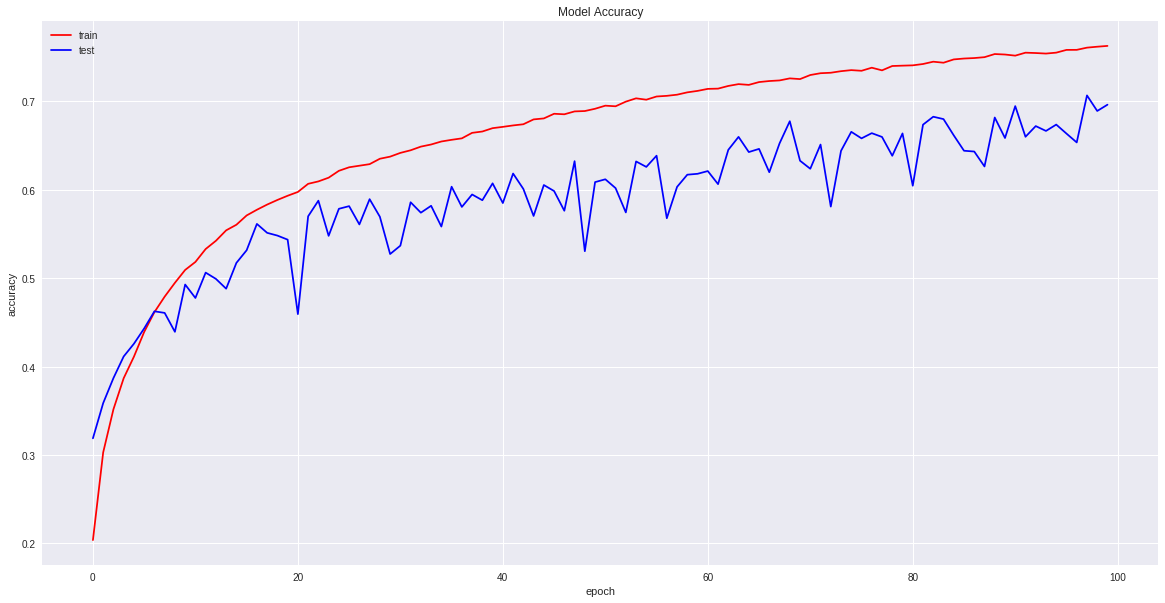

In [0]:
# list all data in history
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history_1.history['acc'], color = 'r')
plt.plot(history_1.history['val_acc'], color = 'b')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


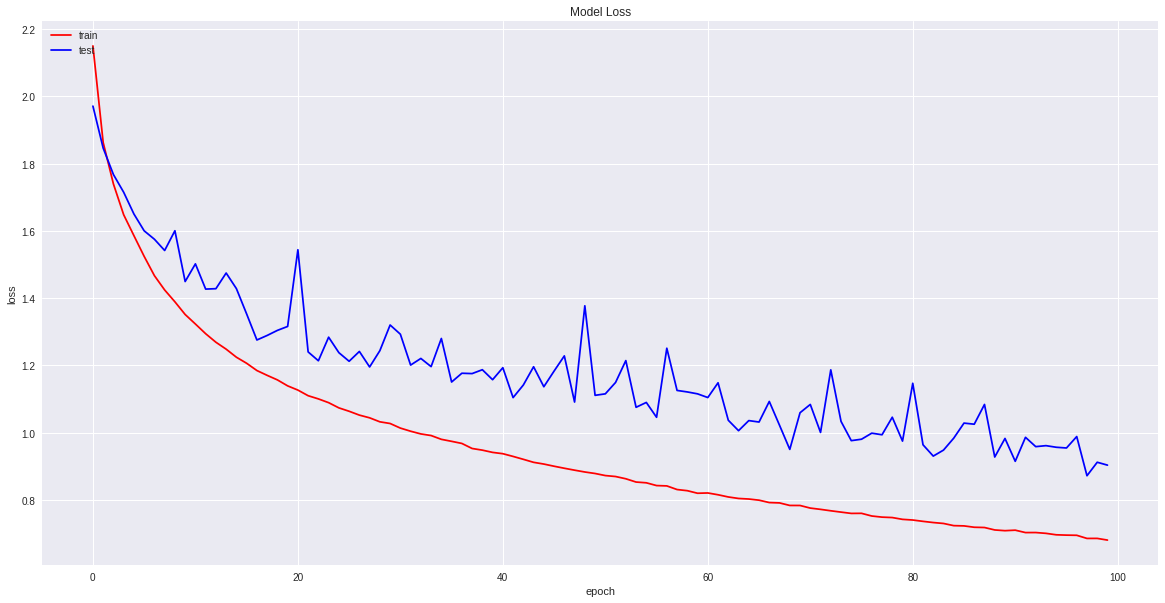

In [0]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history_1.history['loss'], color = 'r')
plt.plot(history_1.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()